<a href="https://colab.research.google.com/github/tarachandaniheena/Unsupervised-Learning/blob/main/Unsupervised_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade&Ahead



## Importing necessary libraries and data

In [ ]:
#libraries to manipulate data
import numpy as np
import pandas as pd

# libraries to help with visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-scotre
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to compute k-means clusterng and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA



In [ ]:
data = pd.read_csv('stock_data.csv')
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


## Data Overview

- Observations
- Sanity checks

In [ ]:
data.shape

(340, 15)

The dataset has 340 rows and 15 columns.

In [ ]:
#Displaying few rows of the dataset
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [ ]:
#Creatign copy of original data
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

The dataset has 4 object type columns and 10 int-float values.

In [ ]:
df.describe()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


All the features have certain difference between median and mean which shows that the data is skewed.

In [ ]:
# Checking for missing values
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

There are no missing values in the dataset.

In [ ]:
# Checking for repetitive ticker symbol
df['Ticker Symbol'].value_counts()

AAL     1
NEE     1
NUE     1
NTRS    1
NSC     1
       ..
EQR     1
EQIX    1
EOG     1
EMN     1
ZTS     1
Name: Ticker Symbol, Length: 340, dtype: int64

In [ ]:
# Dropping ticker symbol as it does not add any value
df = df.drop('Ticker Symbol',axis=1)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

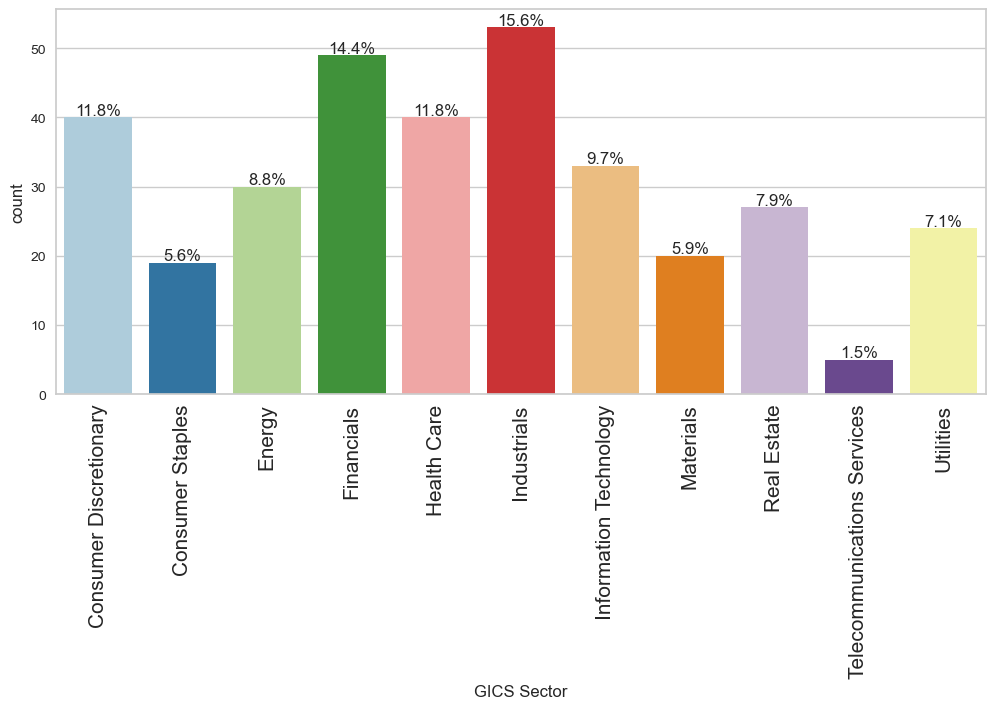

In [ ]:
labeled_barplot(df, "GICS Sector", perc=True)

Majority of records are from Industrials and Financials industry

In [ ]:
df["GICS Sub Industry"].value_counts(normalize=True)

Oil & Gas Exploration & Production            0.047059
REITs                                         0.041176
Industrial Conglomerates                      0.041176
Electric Utilities                            0.035294
Internet Software & Services                  0.035294
                                                ...   
Technology Hardware, Storage & Peripherals    0.002941
Real Estate Services                          0.002941
Trucking                                      0.002941
Networking Equipment                          0.002941
Casinos & Gaming                              0.002941
Name: GICS Sub Industry, Length: 104, dtype: float64

we have 104 types of subcategories in the dataset with Oil & Gas Exploration & Production, REITs and Industrial Conglomerates being the top 3.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

/var/folders/fq/_qtlcnfd1sv_pbjm8l28nwrh0000gp/T/ipykernel_16531/3188613800.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/fq/_qtlcnfd1sv_pbjm8l28nwrh0000gp/T/ipykernel_16531/3188613800.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/fq/_qtlcnfd1sv_pbjm8l28nwrh0000gp/T/ipykernel_16531/3188613800.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/fq/_qtlcnfd1sv_pbjm8l28nwrh0000gp/T/ipykernel_16531/3188613800.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/fq/_qtlcnfd1sv_pbjm8l28nwrh0000gp/T/ipykernel_16531/3188613800.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/fq/_qtlcnfd1sv_pbjm8l28nwrh0000gp/T/ipykernel_16531/3188613800.py:23: UserWarning: Ignoring `palette` becau

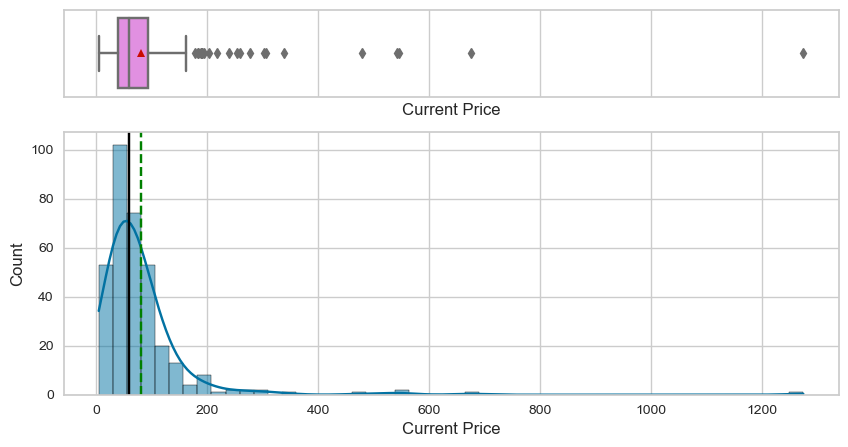

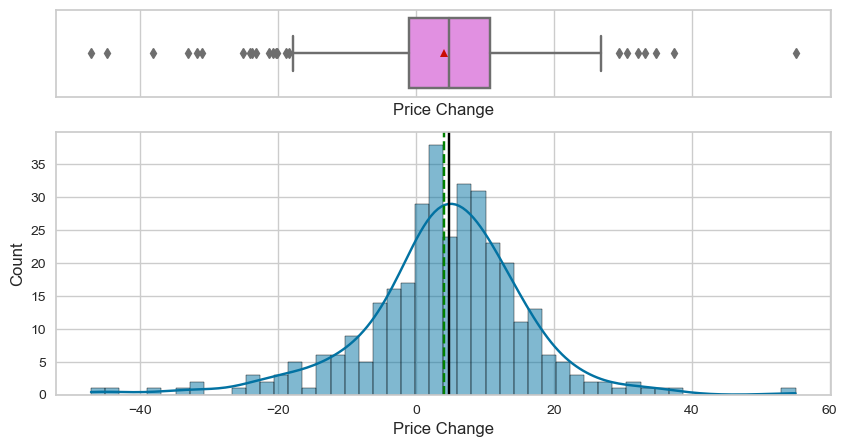

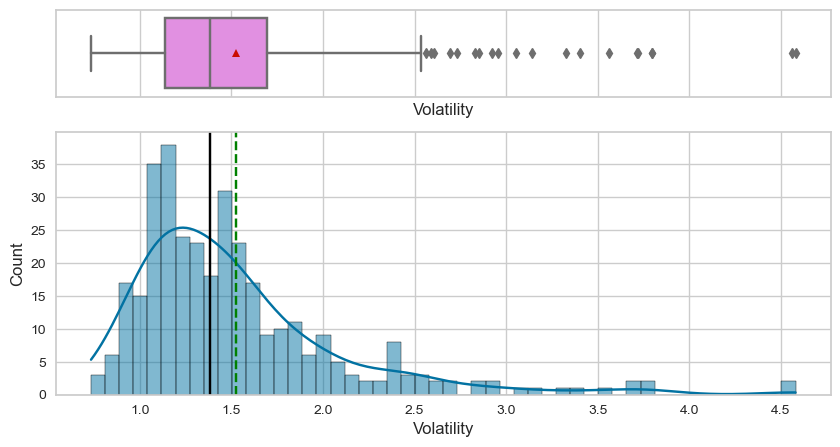

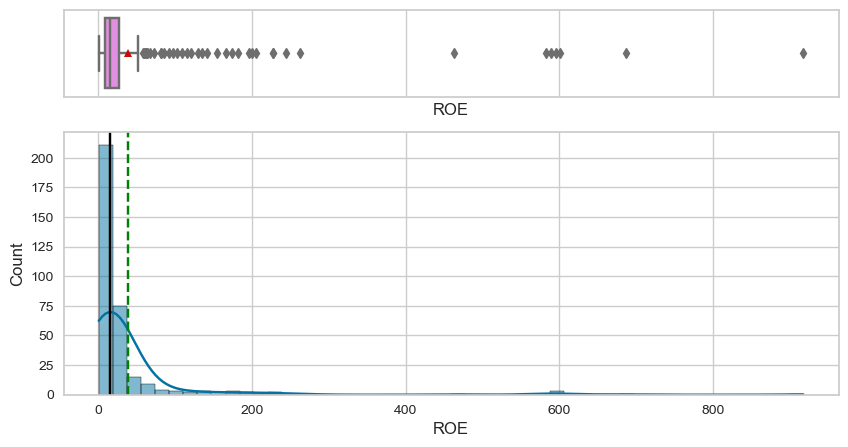

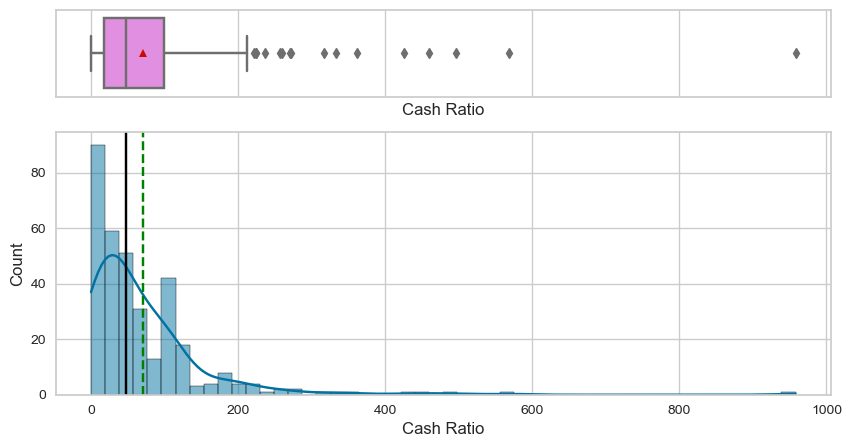

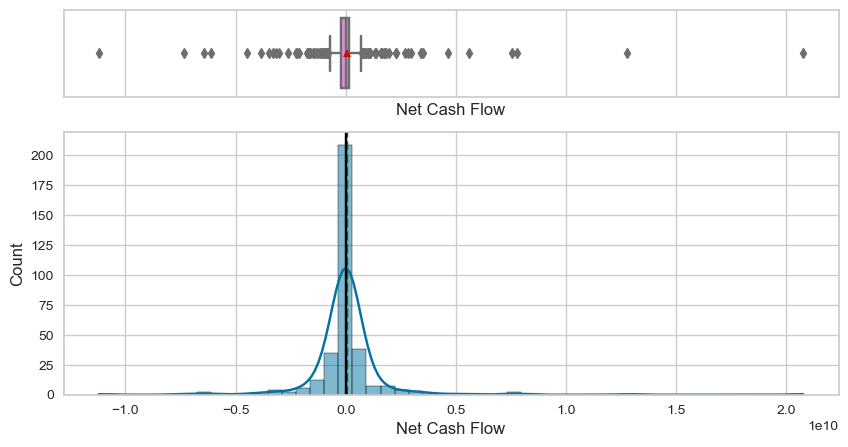

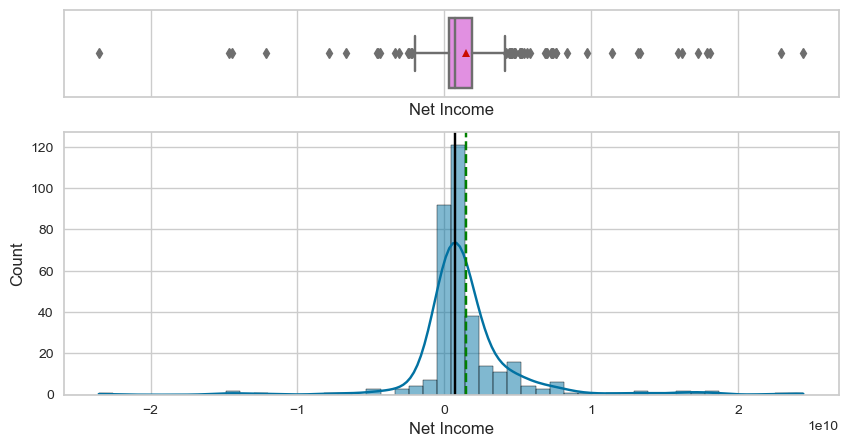

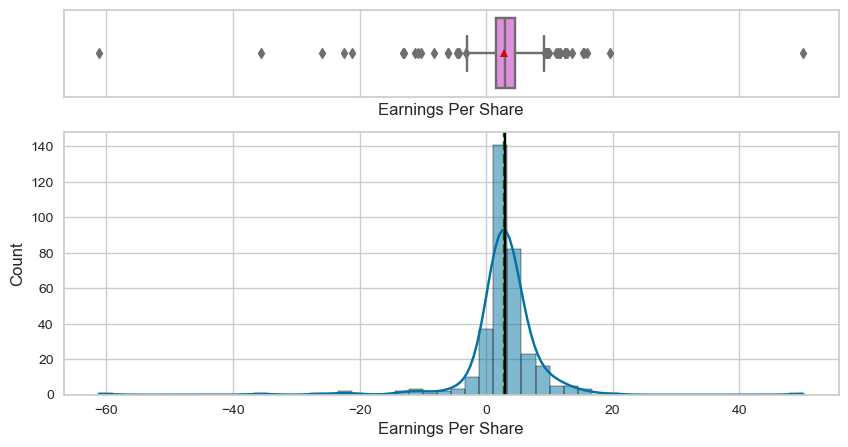

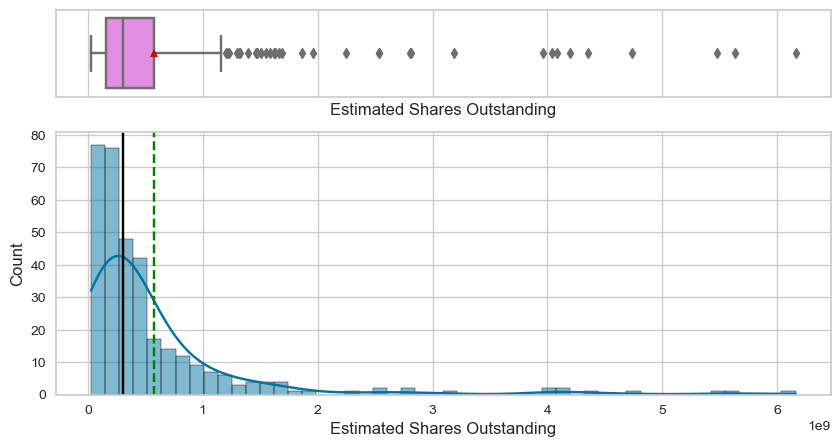

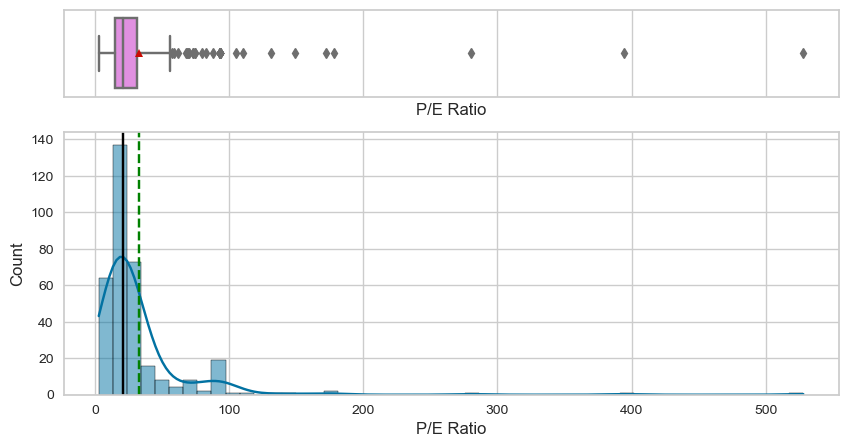

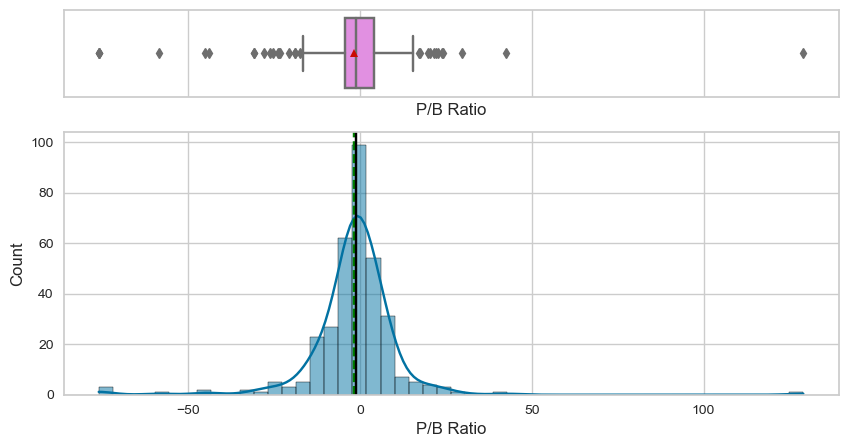

In [ ]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))

We have a combination of left skewed and normal data

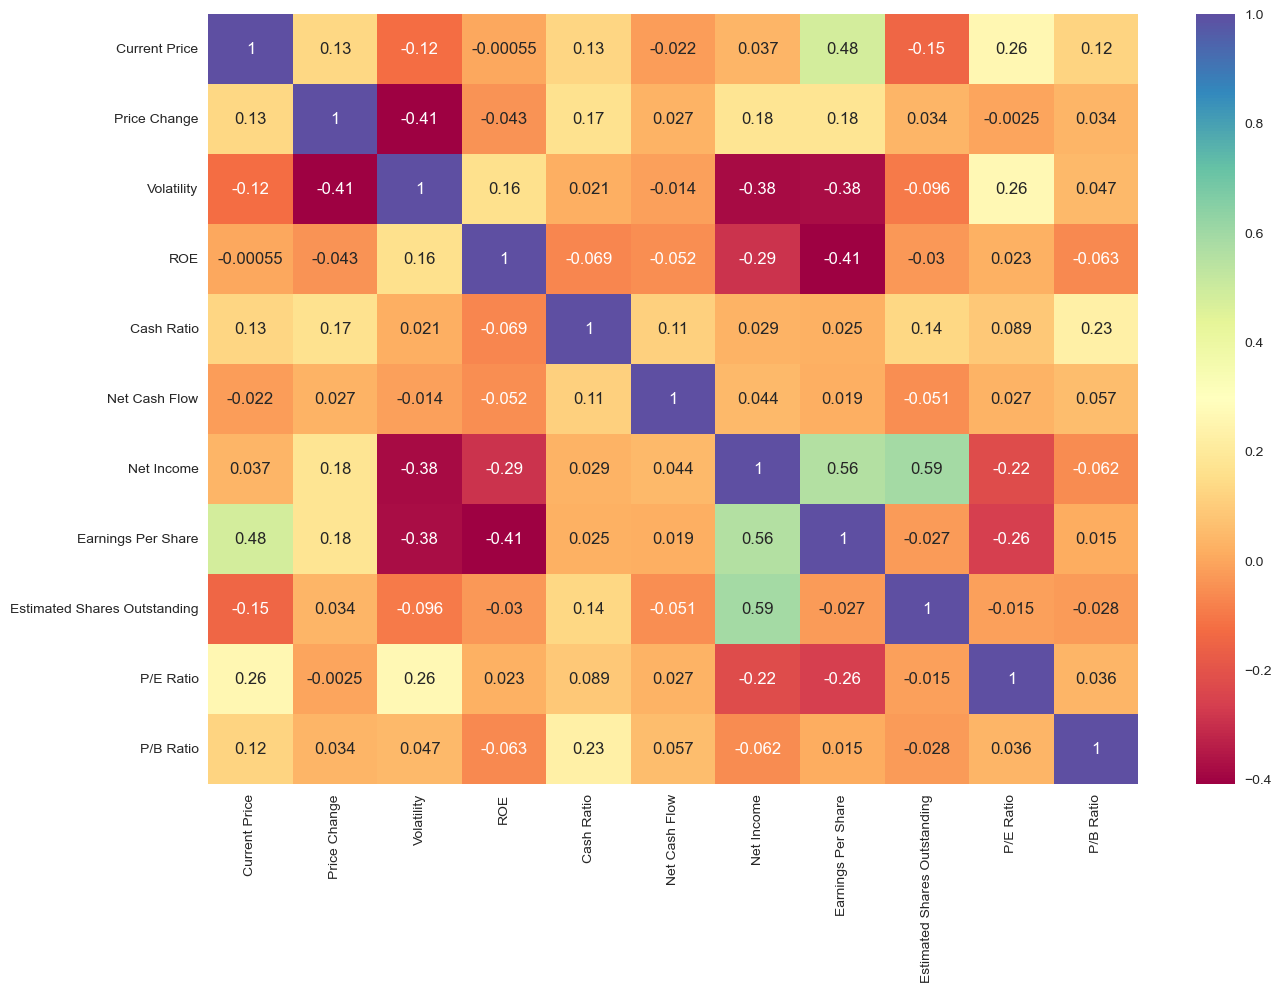

In [ ]:
# Calculating correlation between the numerical variables
numerics = ['int64','float64']
num_col = df.select_dtypes(include=numerics)
num_col.head()

# Creating heatmap
plt.figure(figsize=(15,10))
sns.heatmap(num_col.corr(), annot=True,cmap='Spectral');

We notice an average correlation between Net income and Estimated Shares outstanding & Earnings per share & Net income.

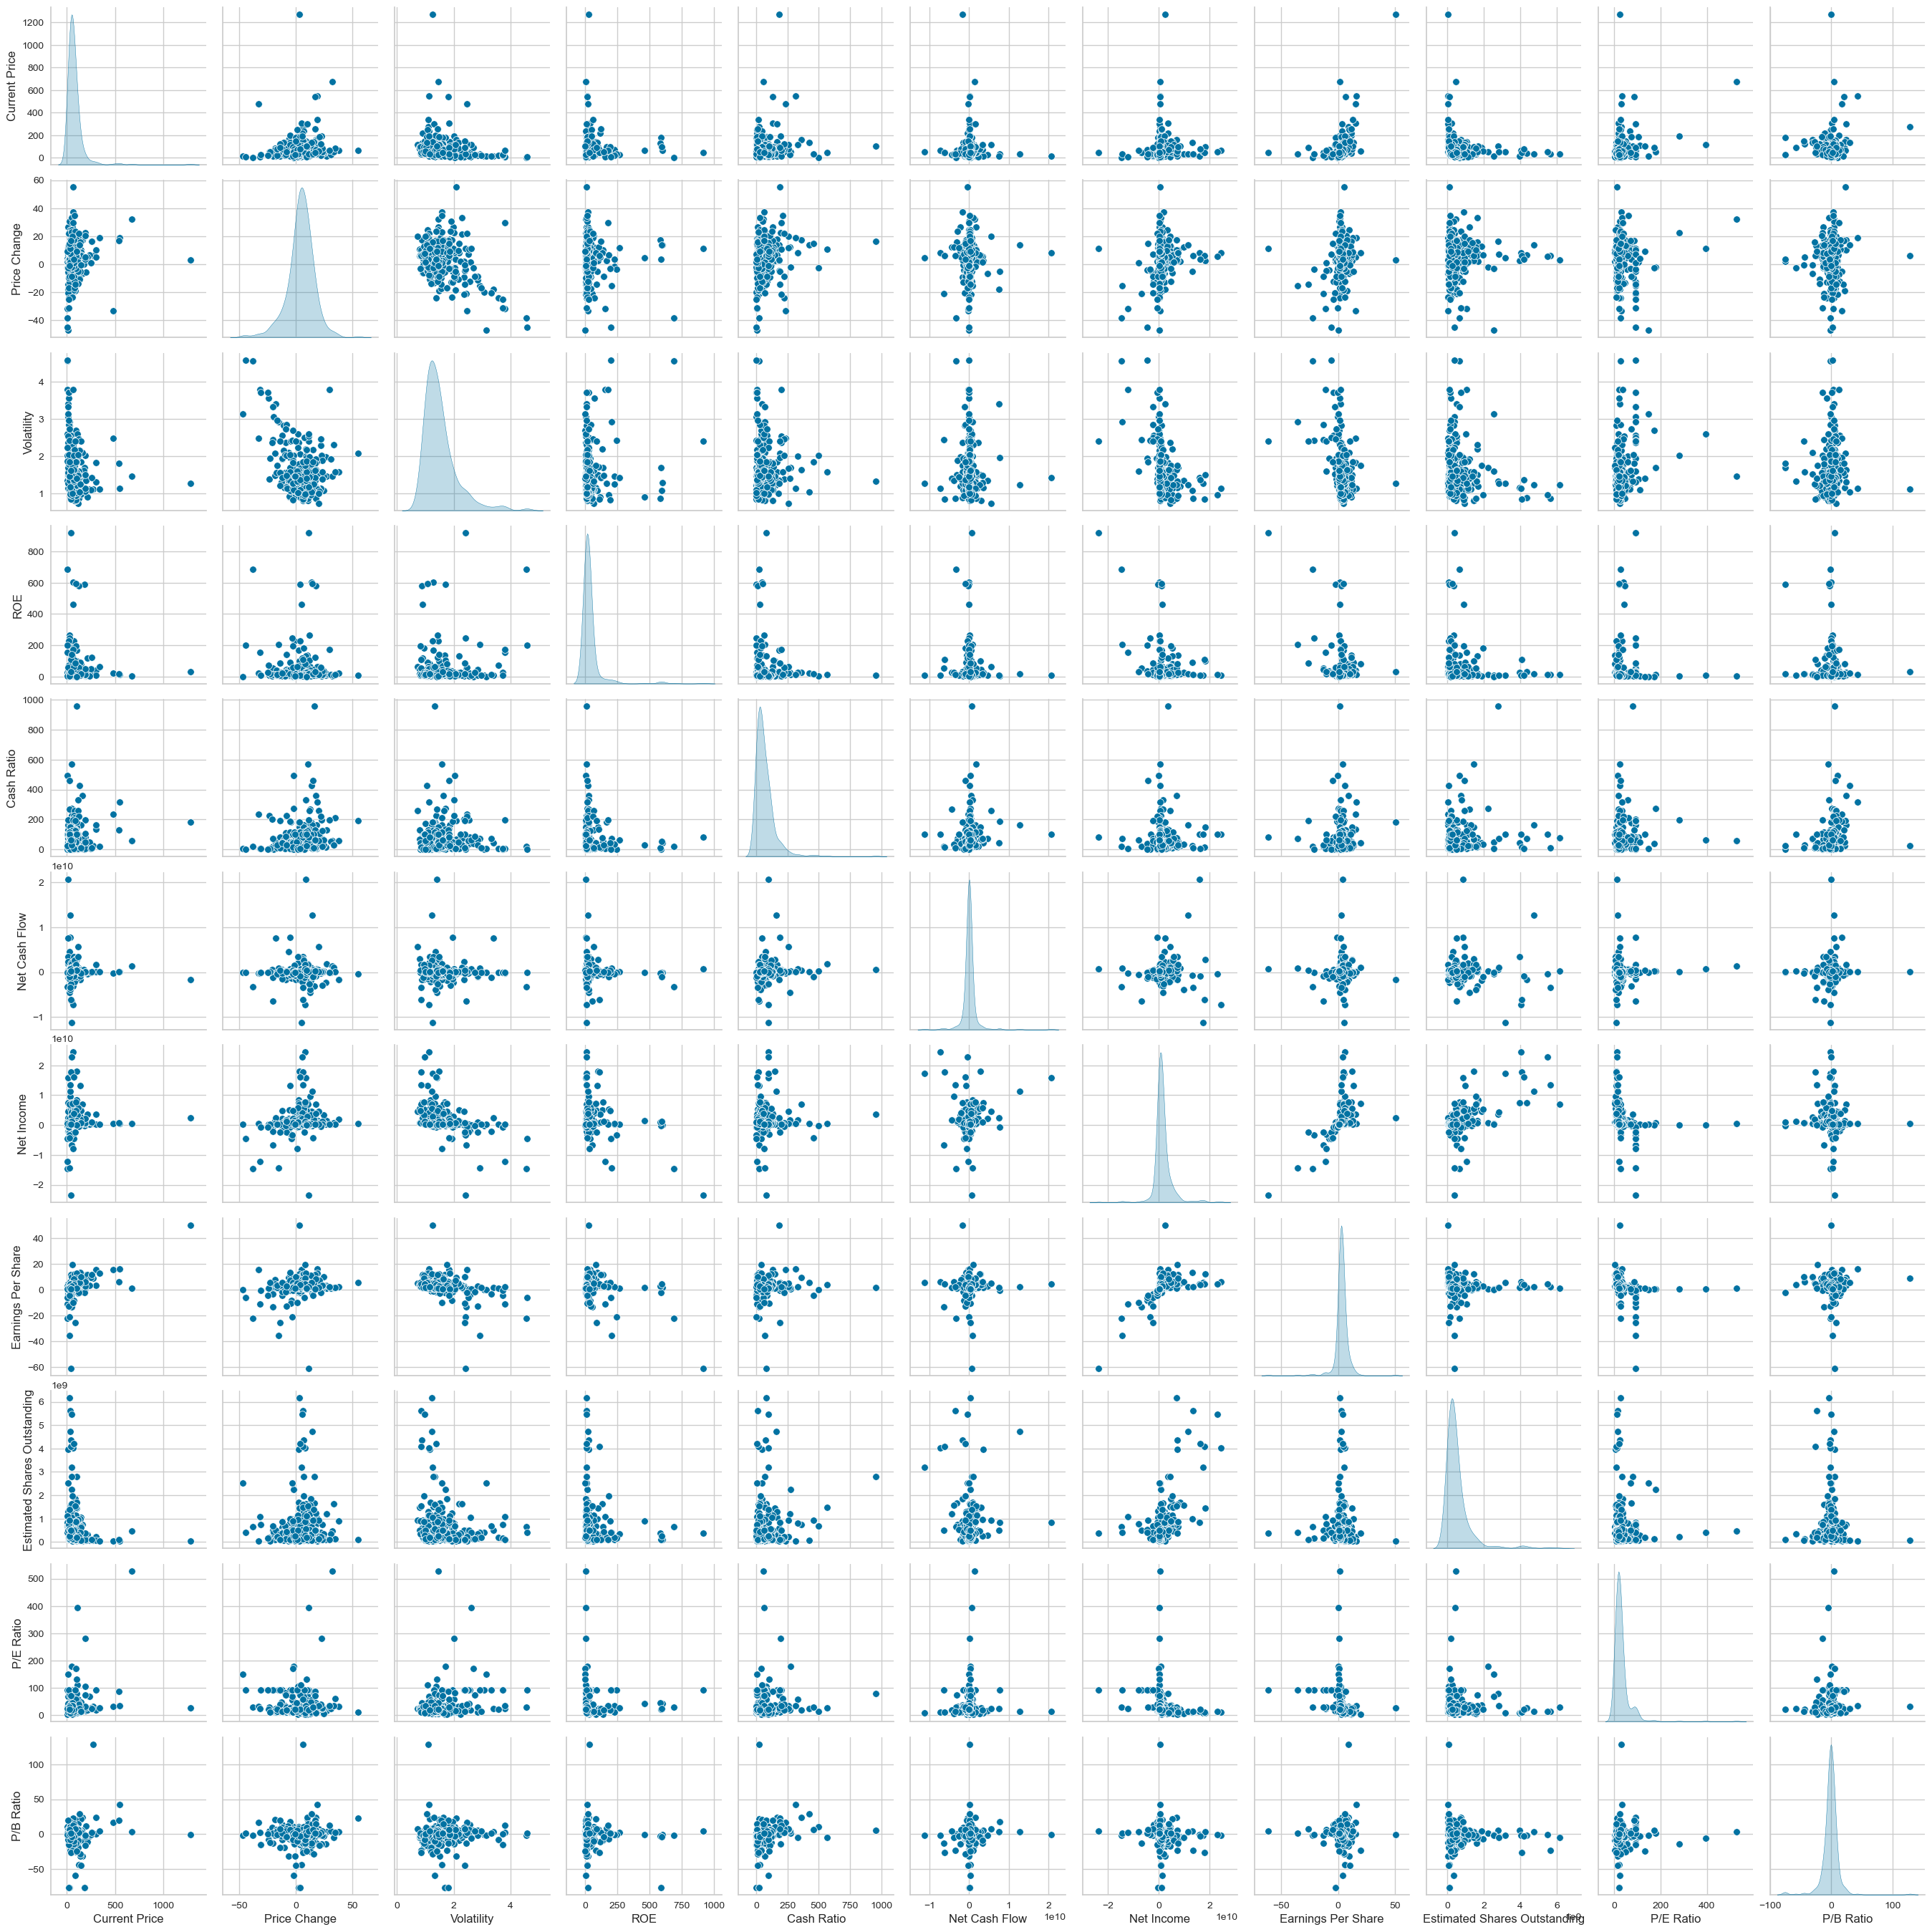

In [ ]:
sns.pairplot(data=num_col, diag_kind='kde')

Price change is normally distributed, rest everything is skewed.

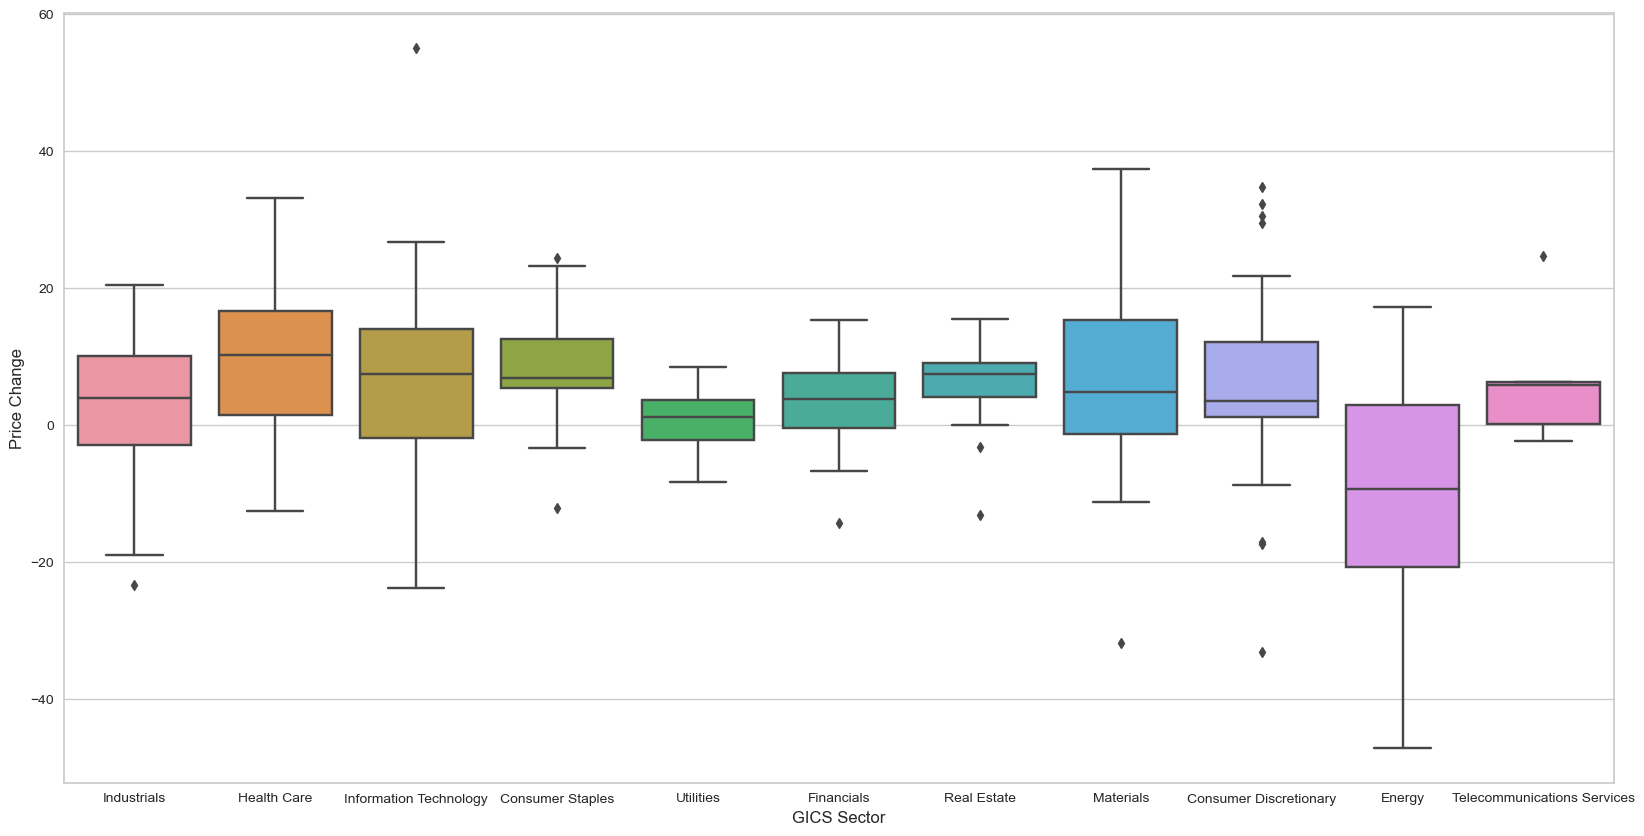

In [ ]:
# checking price change across different sectors
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="GICS Sector",y="Price Change");

Energy has the highest price change distribution compared to other industries.

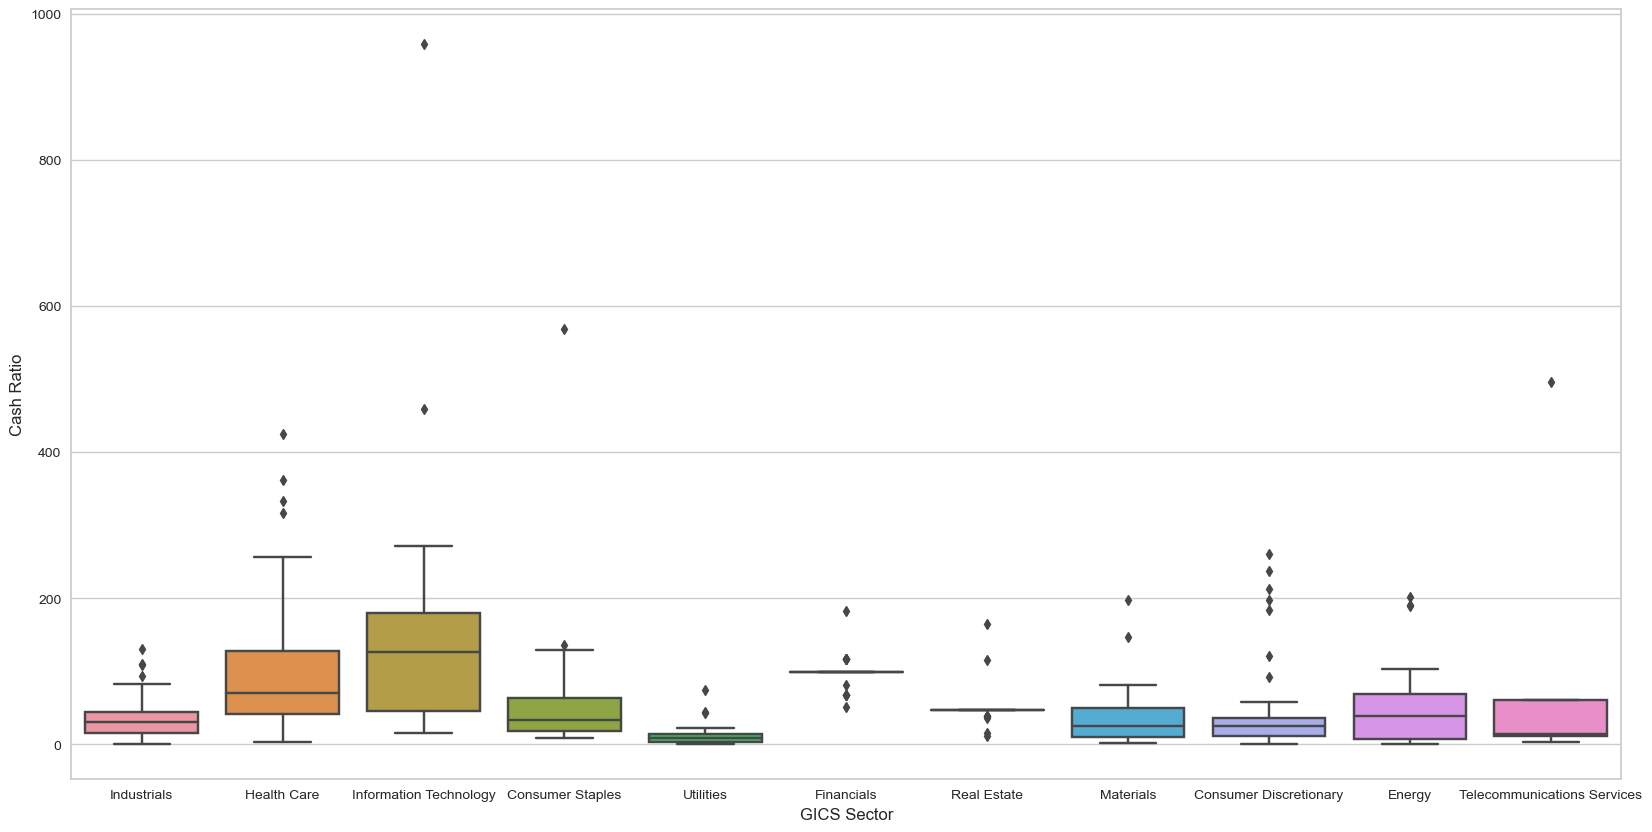

In [ ]:
# checking price change across different sectors
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="GICS Sector",y="Cash Ratio");

Cash ratio across utilities and consumer discretionary is very low. Health care and IT have a high cash ratio.

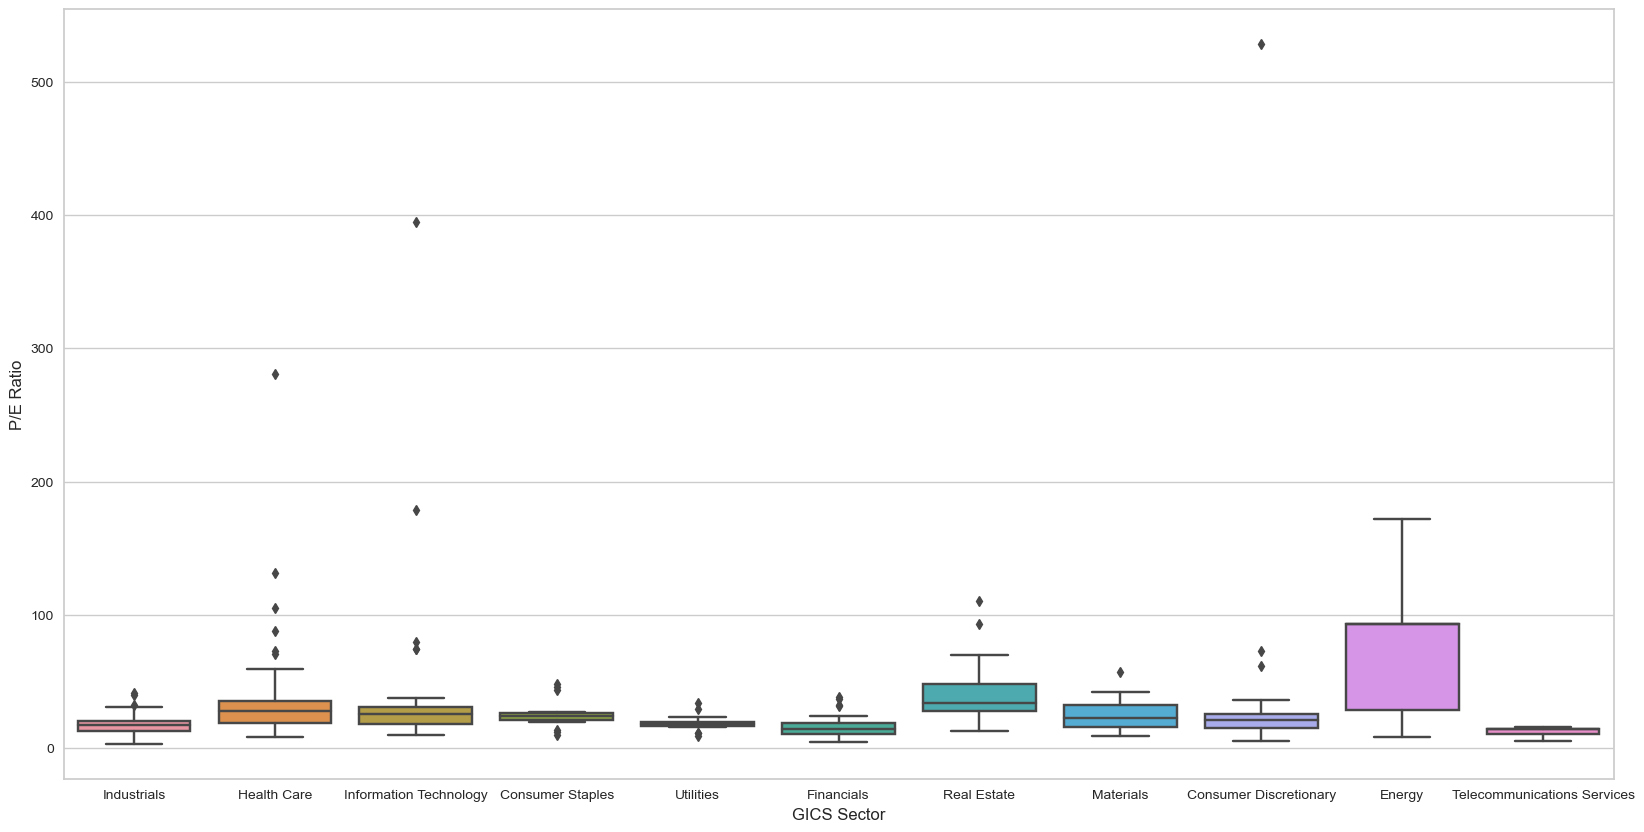

In [ ]:
# checking price change across different sectors
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="GICS Sector",y="P/E Ratio");

Energy has the highest P/E ratio.

In [ ]:
#Scaling the data before clustering
Scaler = StandardScaler()
subset = num_col.copy()
subset_scaled = Scaler.fit_transform(subset)

In [ ]:
# Creating dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled,columns=subset.columns)
subset_scaled_df

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196
...,...,...,...,...,...,...,...,...,...,...,...
335,-0.486181,0.901646,0.540121,-0.255142,4.308162,-0.559673,-1.487784,-1.127481,0.429111,-0.082116,0.572194
336,-0.289510,-1.065766,-0.079703,1.062211,-0.476513,0.053235,-0.051186,0.029391,-0.167741,-0.337154,-0.152012
337,0.221913,0.439539,-0.206067,-0.400362,0.332009,0.164889,-0.342467,-0.303532,-0.460058,2.233634,-1.589390
338,-0.547053,-0.436811,-0.097813,-0.369243,0.320933,-0.051022,-0.301171,-0.239684,-0.377852,-0.222714,0.118680


## K-means Clustering

Number of Clusters: 1 	Averge Distrotion: 2.5425069919221697
Number of Clusters: 2 	Averge Distrotion: 2.382318498894466
Number of Clusters: 3 	Averge Distrotion: 2.2659355306126447
Number of Clusters: 4 	Averge Distrotion: 2.179645269703779
Number of Clusters: 5 	Averge Distrotion: 2.1393043217488574
Number of Clusters: 6 	Averge Distrotion: 2.0834111429854754
Number of Clusters: 7 	Averge Distrotion: 2.030558099307513
Number of Clusters: 8 	Averge Distrotion: 1.9758045641370783


Text(0.5, 1.0, 'Selecting k with elbow method')

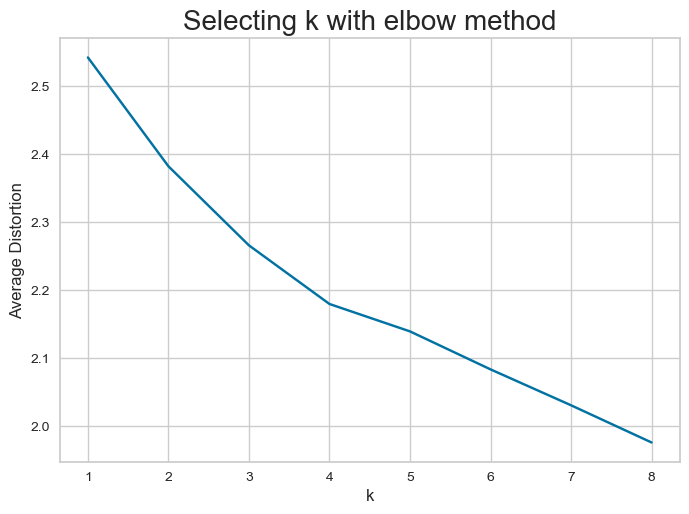

In [ ]:
clusters = range(1,9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)

    distortion = (
    sum(
        np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
    ))/subset_scaled_df.shape[0]

    meanDistortions.append(distortion)

    print("Number of Clusters:",k, "\tAverge Distrotion:", distortion)
plt.plot(clusters, meanDistortions)
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with elbow method", fontsize=20)

The approporiate value fo k from the elbow curve seems to be 4 or 5.

For n_clusters = 2,silhouette_score is 0.43969639509980457 
For n_clusters = 3,silhouette_score is 0.4623841900167334 
For n_clusters = 4,silhouette_score is 0.4495910932182279 
For n_clusters = 5,silhouette_score is 0.40999356683171667 
For n_clusters = 6,silhouette_score is 0.3895372223622251 
For n_clusters = 7,silhouette_score is 0.41665283542427983 
For n_clusters = 8,silhouette_score is 0.4134759756947335 
For n_clusters = 9,silhouette_score is 0.2161148457205412 


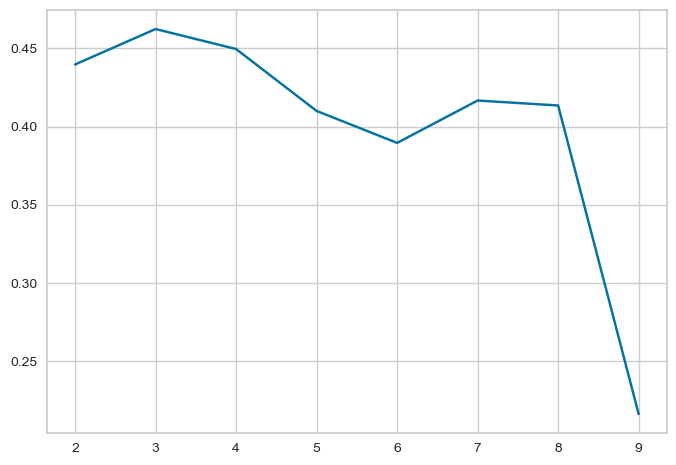

In [ ]:
# Lets check the silhouette scores
sil_score = []
cluster_list = list(range(2,10))
for n in cluster_list:
    clusterr = KMeans(n_clusters=n)
    preds = clusterr.fit_predict(subset_scaled_df)
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {},silhouette_score is {} ".format(n, score))
plt.plot(cluster_list,sil_score)


From silhouette_score, 3 seems to be a good value of k

In [ ]:
%%time
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

CPU times: user 465 ms, sys: 39.7 ms, total: 505 ms
Wall time: 34.8 ms


KMeans(n_clusters=3, random_state=0)

In [ ]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

In [ ]:
cluster_profile = df.groupby("K_means_segments").mean()

In [ ]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["K_means_segments"].count().values
)

In [ ]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,84.250468,5.595187,1.402117,34.146758,66.815700,10741689.419795,1449597119.453925,3.902338,426357529.820239,24.416003,-2.011211,293
1,52.142857,6.779993,1.175153,26.142857,140.142857,760285714.285714,13368785714.285715,3.769286,3838879870.871428,20.654832,-3.529270,14
2,62.963940,-10.537087,2.774534,93.696970,68.757576,154287151.515152,-3145581545.454545,-7.639091,530986678.995152,110.461063,1.651207,33


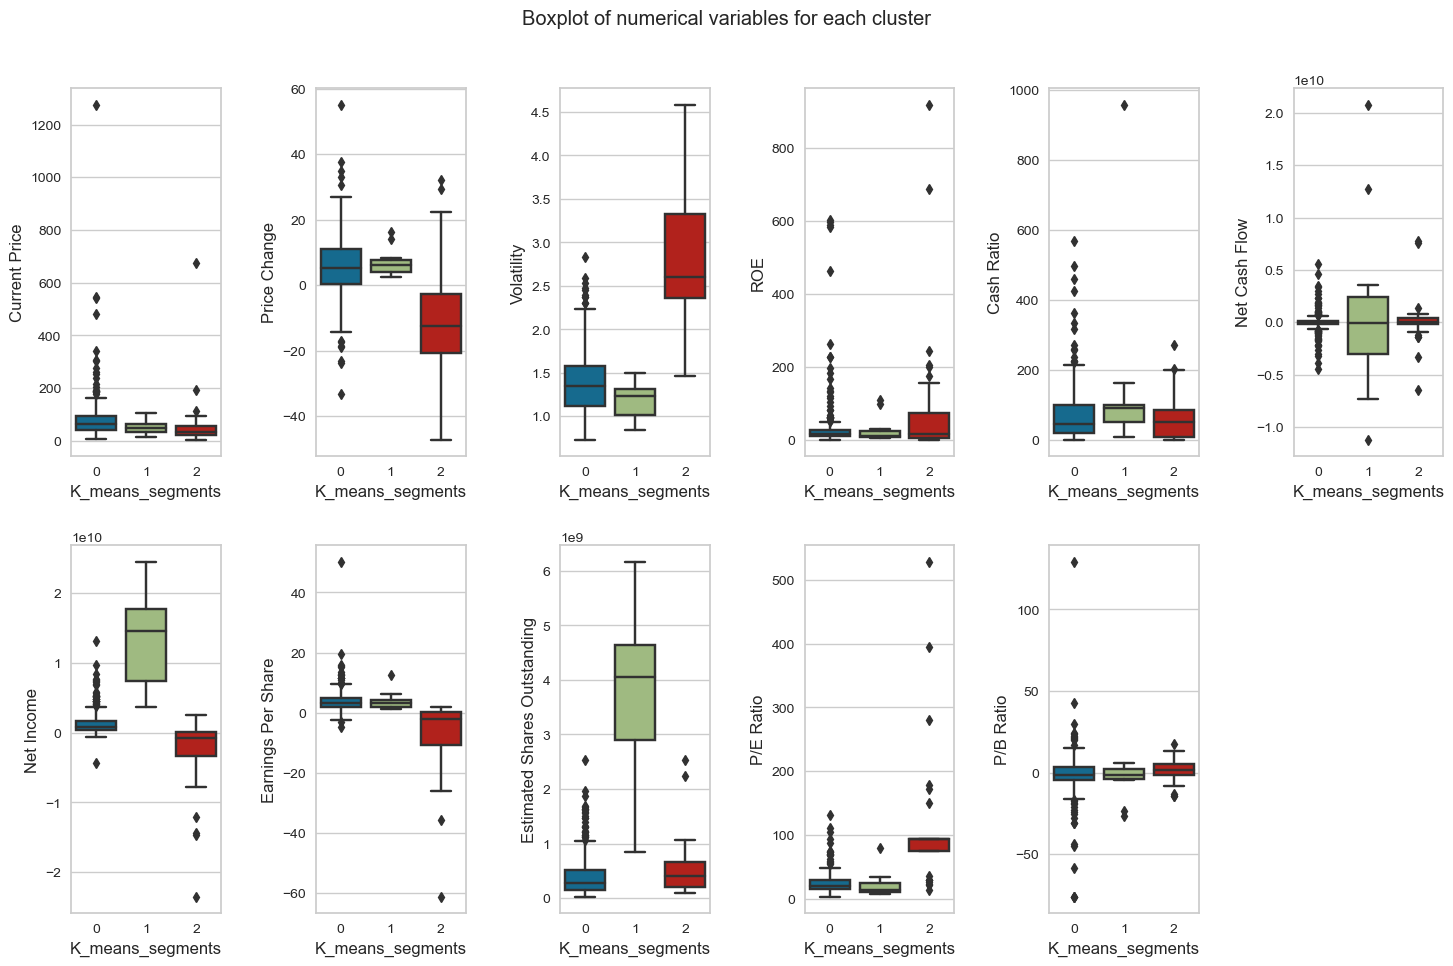

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(2, 6, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

Cluster 0:
- Net income is thie highest
- Estimated shares outstanding is high
- P/E ratio is less

Cluster 1:
- Price change is high
- P/B ratio is low

Cluster 2:
- Current Price is low
- Votality is high
- Earnings per share is low


## Hierarchical Clustering

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correl

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


In [ ]:
# Exploring different linkage methods usin Euclidean distances only
# list of distance metrics
distance_metrics = ["euclidean"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted","centroid","ward"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Euclidean distance and centroid linkage is 0.9314012446828154.
Cophenetic correlation for Euclidean distance and ward linkage is 0.7101180299865353.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


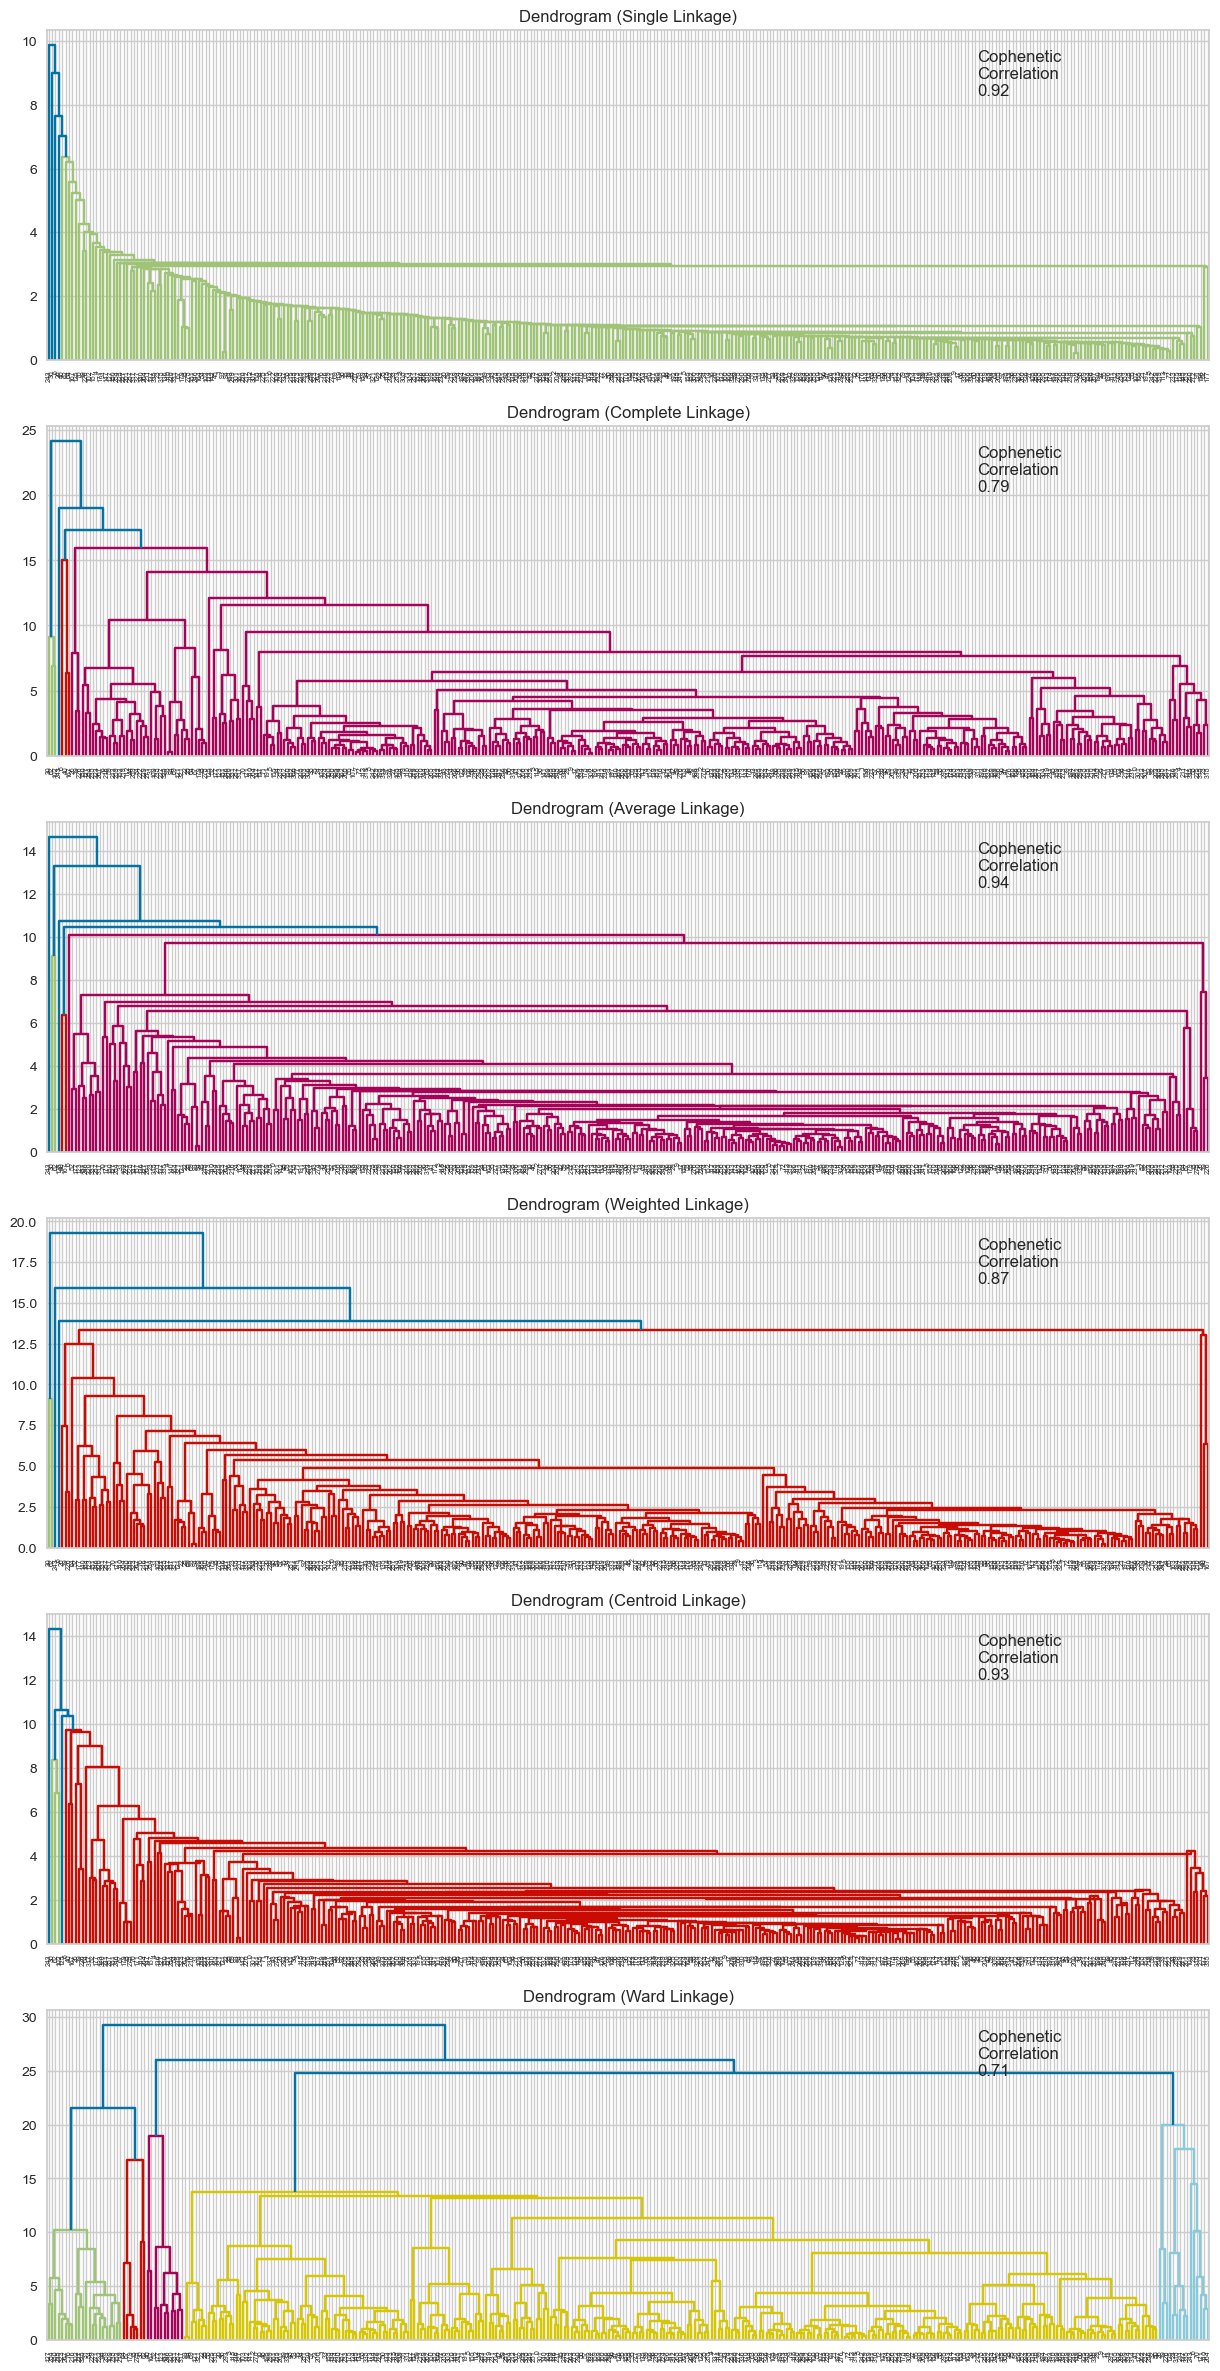

In [ ]:
# Check Dendrogram


# list of linkage methods
linkage_methods =  ["single", "complete", "average", "weighted","centroid","ward"]

fig, ax = plt.subplots(len(linkage_methods), 1, figsize=(15,30))


# for each linkage method we plot dendogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric = "euclidean",method=method)
    dendrogram(Z,ax=ax[i],p=30)

    ax[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    ax[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )



- Cophenetic correlation is highest for average and centroid linkage methods.
- Moving ahead with average linkage
- 5 appears to be the appropriate number of clusters from dendrogram for average linkage.

In [ ]:
# Creating model using sklearn
# Using average linkage
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean",linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [ ]:
subset_scaled_df["HC Clusers"]= HCmodel.labels_
df["HC Clusters"] = HCmodel.labels_

In [ ]:
# Cluster Profiling
df.sample(n=10, random_state=1)

,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,HC Clusters
102,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616,2,0
125,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467,1,0
11,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332,0,0
248,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747,0,0
238,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102,2,0
336,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260,0,0
112,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952,2,0
147,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857,2,0
89,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934,0,0
173,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620,0,0


In [ ]:
cluster_profile = df.groupby("HC Clusters").mean()
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments
HC Clusters,,,,,,,,,,,,
0,77.653642,4.184271,1.515129,35.103858,69.79822,6.866225e+07,1.613509e+09,2.900905,5.789304e+08,32.466828,-1.739711,0.225519
1,1274.949951,3.190527,1.268340,29.000000,184.00000,-1.671386e+09,2.551360e+09,50.090000,5.093552e+07,25.453183,-1.052429,0.000000
2,24.485001,-13.351992,3.482611,802.000000,51.00000,-1.292500e+09,-1.910650e+10,-41.815000,5.195740e+08,60.748608,1.565141,2.000000


In [ ]:
cluster_profile["count in each segments"] = (df.groupby("HC Clusters")["GICS Sector"].count().values)
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count in each segments
HC Clusters,,,,,,,,,,,,,
0,77.653642,4.184271,1.515129,35.103858,69.79822,6.866225e+07,1.613509e+09,2.900905,5.789304e+08,32.466828,-1.739711,0.225519,337
1,1274.949951,3.190527,1.268340,29.000000,184.00000,-1.671386e+09,2.551360e+09,50.090000,5.093552e+07,25.453183,-1.052429,0.000000,1
2,24.485001,-13.351992,3.482611,802.000000,51.00000,-1.292500e+09,-1.910650e+10,-41.815000,5.195740e+08,60.748608,1.565141,2.000000,2


This cluster is not good as everything is going under 1 cluster.

In [ ]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=2, affinity="euclidean",linkage="ward")
HCmodel.fit(subset_scaled_df)

CPU times: user 4.1 ms, sys: 697 µs, total: 4.8 ms
Wall time: 3.83 ms


AgglomerativeClustering()

In [ ]:
subset_scaled_df["HC Clusers Ward"]= HCmodel.labels_
df["HC Clusters Ward"] = HCmodel.labels_

In [ ]:
cluster_profile = df.groupby("HC Clusters Ward").mean()
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,HC Clusters
HC Clusters Ward,,,,,,,,,,,,,
0,83.926100,5.508733,1.426736,24.961415,72.797428,1.069580e+08,1.969167e+09,3.845868,5.854867e+08,28.649694,-1.676813,0.102894,0.003215
1,48.006208,-11.263107,2.590247,196.551724,40.275862,-4.959017e+08,-3.597245e+09,-8.689655,4.863198e+08,75.110924,-2.162622,1.655172,0.137931


In [ ]:
cluster_profile["count in each segments"] = (df.groupby("HC Clusters Ward")["HC Clusters Ward"].count().values)
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,HC Clusters,count in each segments
HC Clusters Ward,,,,,,,,,,,,,,
0,83.926100,5.508733,1.426736,24.961415,72.797428,1.069580e+08,1.969167e+09,3.845868,5.854867e+08,28.649694,-1.676813,0.102894,0.003215,311
1,48.006208,-11.263107,2.590247,196.551724,40.275862,-4.959017e+08,-3.597245e+09,-8.689655,4.863198e+08,75.110924,-2.162622,1.655172,0.137931,29


Ward linkage is also not giving good clusters.

After trying all methods, best linkage method is ward with 2 clusters.

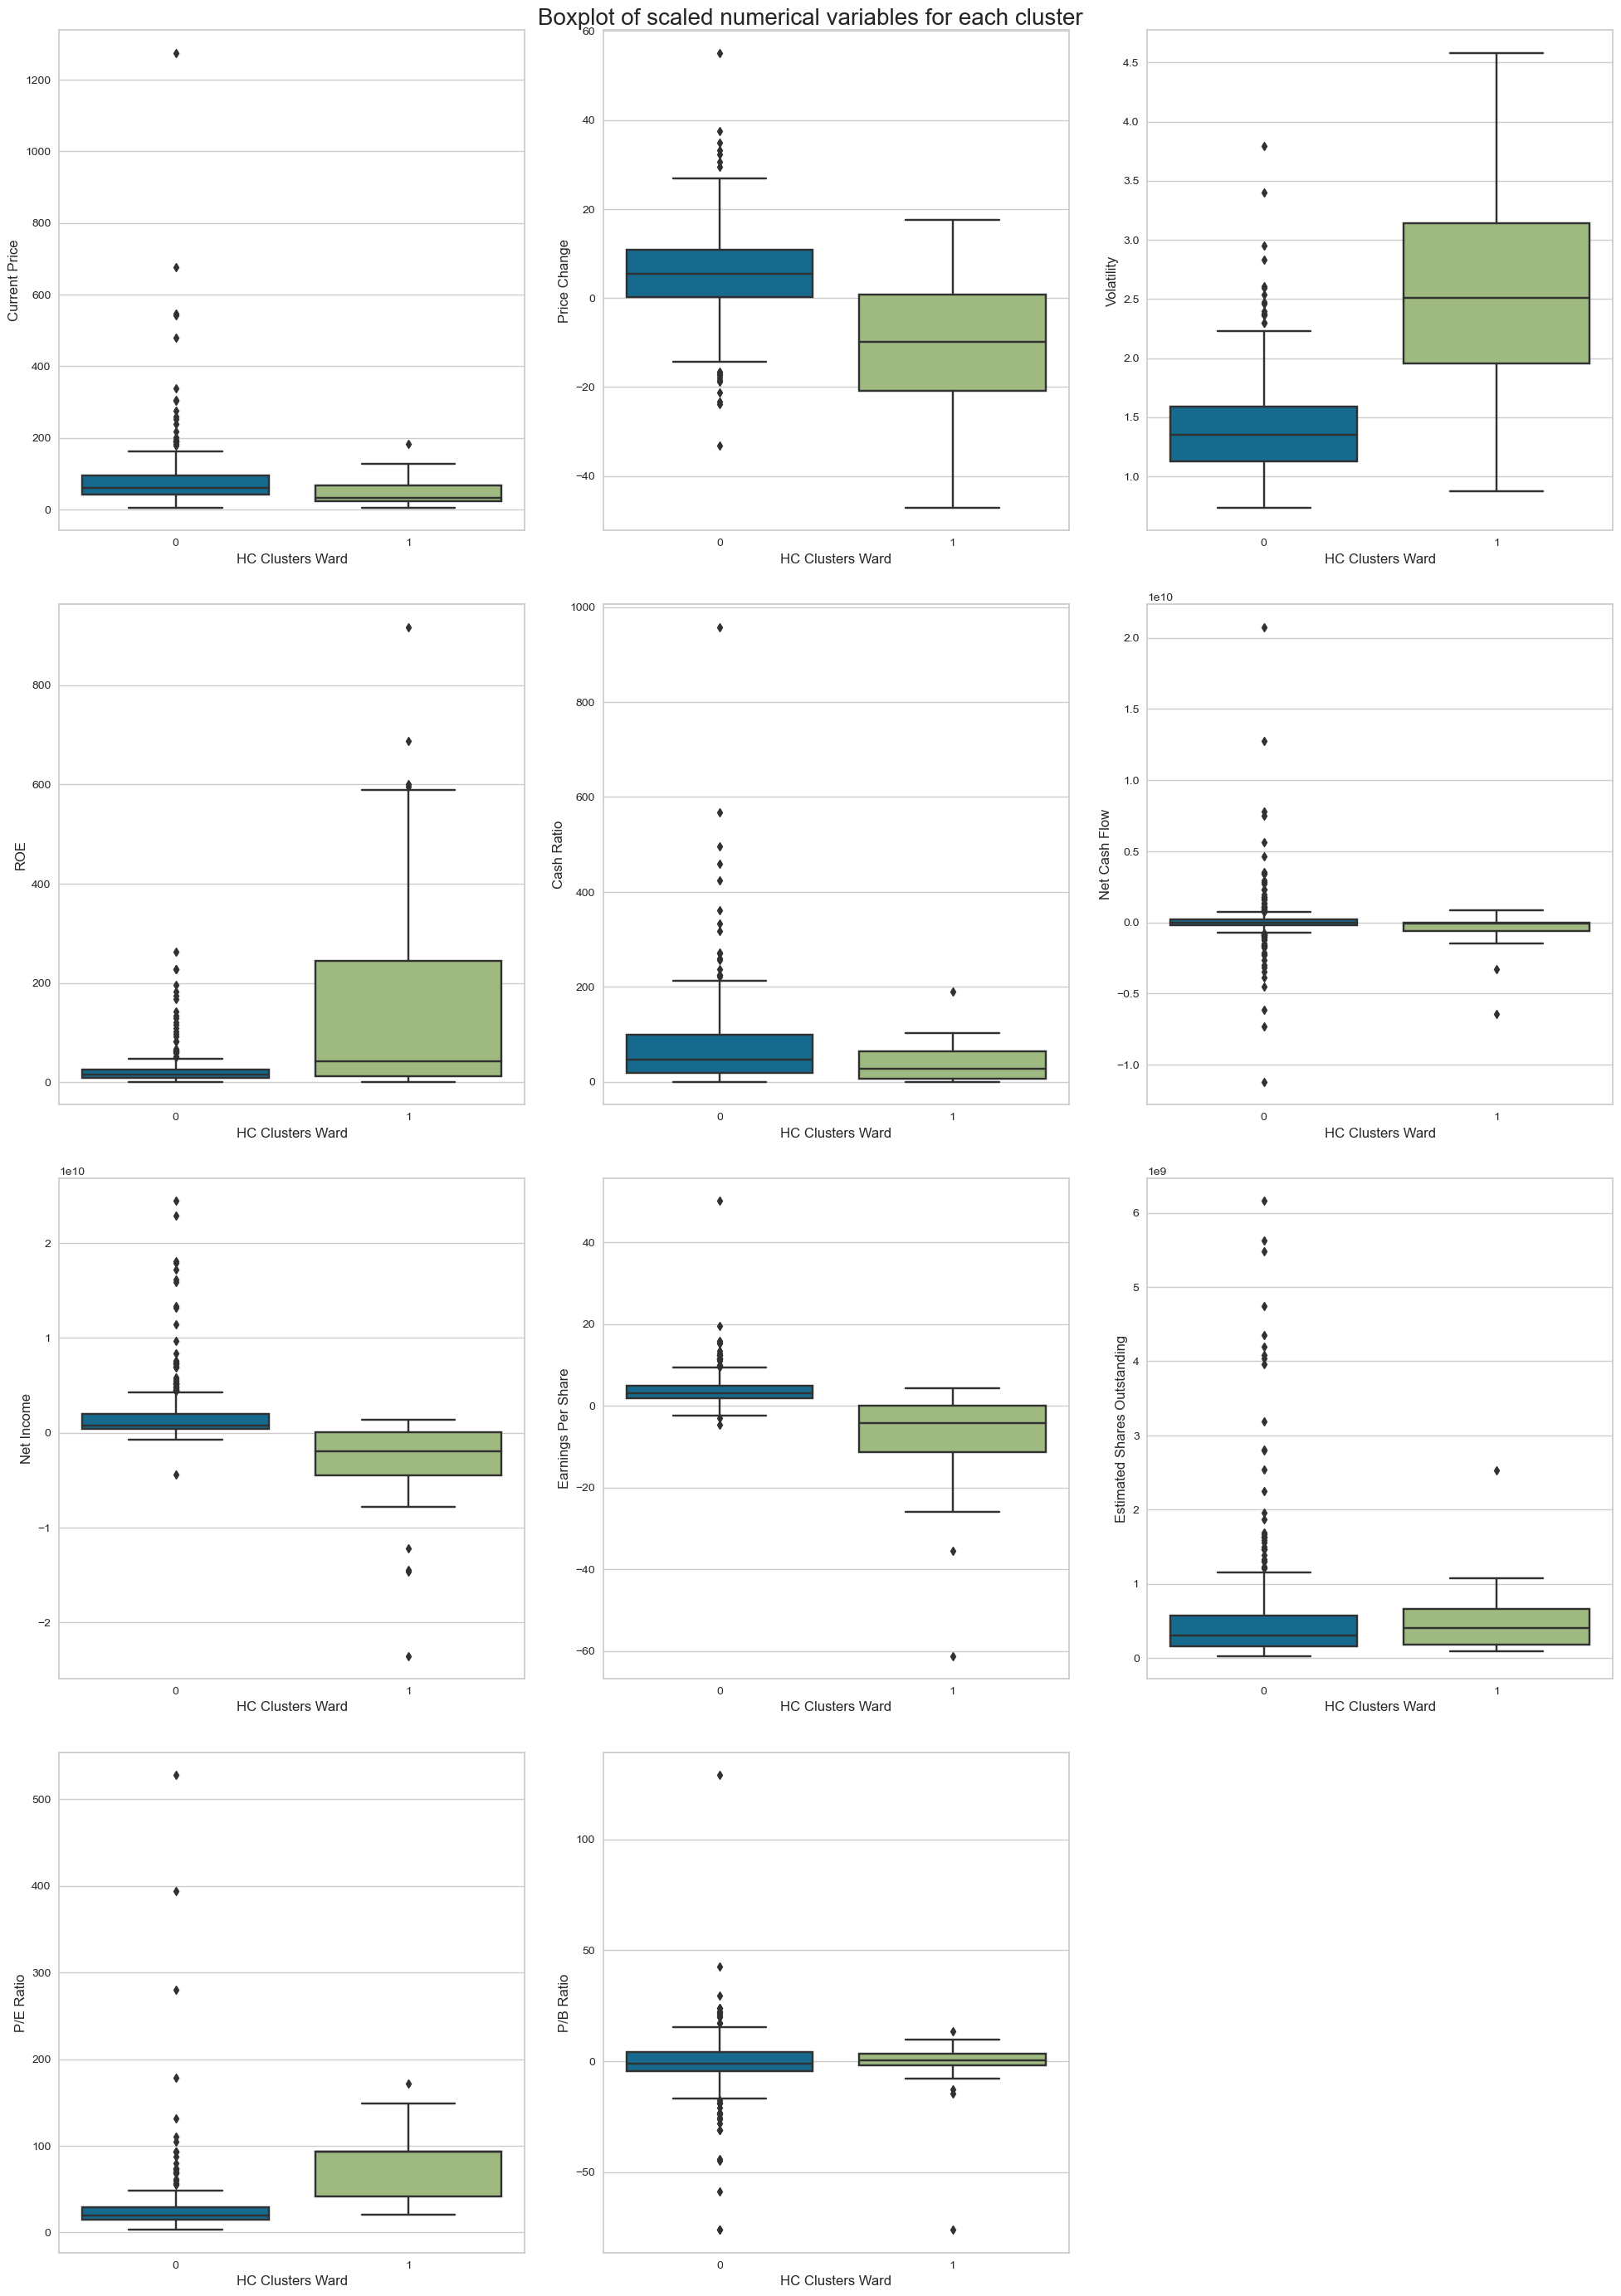

In [ ]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df, x="HC Clusters Ward", y=variable)

plt.tight_layout(pad=2.0)

Cluster 0
- High current price
- High net income
- High price change
- Low ROE
- High cash ratio
- Low P/E ratio
- High Earnings per share

Cluser 1
- High volatality
- High ROE
- Low net income
- Low earnings per ratio
- High P/E ratio

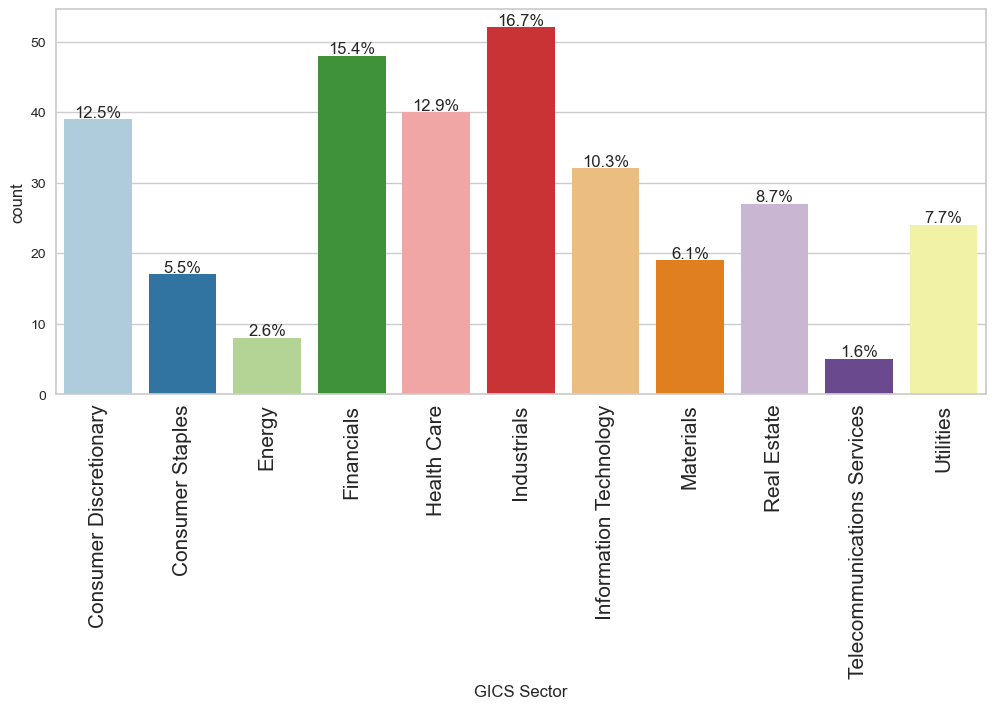

In [ ]:
cluster_0 = df[df["HC Clusters Ward"] == 0]
labeled_barplot(cluster_0, "GICS Sector", perc=True)

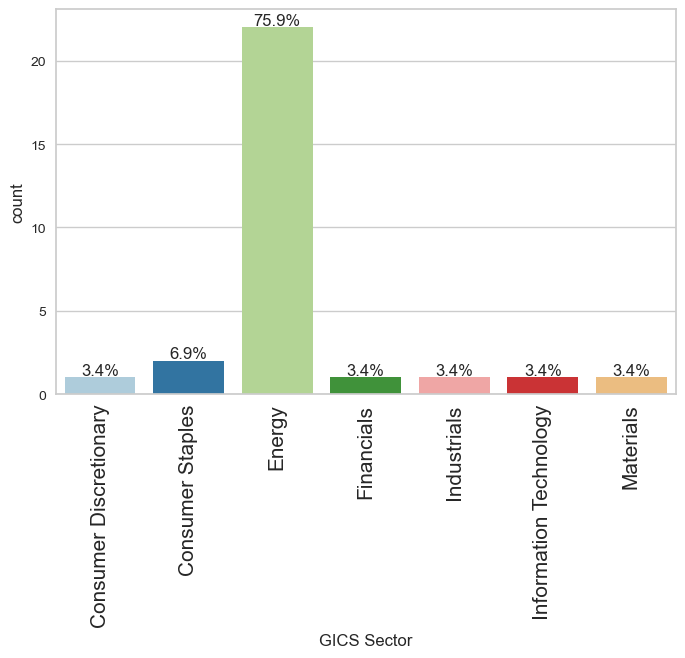

In [ ]:
cluster_1 = df[df["HC Clusters Ward"] == 1]
labeled_barplot(cluster_1, "GICS Sector", perc=True)

## K-means vs Hierarchical Clustering

### Time:
- K Means Time
 CPU times: user 551 ms, sys: 94.2 ms, total: 645 ms
 Wall time: 54.2 ms
- HC Time
 CPU times: user 5.83 ms, sys: 1.43 ms, total: 7.26 ms
 Wall time: 5.67 ms

#### HC was faster to execute.

### Distinct Clusters:
K Means: 3
HC: 2
#### HC returned better distinct clusters.

### Number of clusters:
2 clusters from HC are appropriate number of clusters.

## Actionable Insights and Recommendations

-

- Investors can start with cluster 1 obtained from HC as they have high PE ratio in incustries like Energy which are priced low as well
- Later, in order to diversify investors can invest in cluster 0 for diversification in IT and Healthcare